In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


In [2]:
f = pd.read_csv('Fraud_check.csv')
f

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
f_c1 = f.drop(['City.Population'], axis = 1)
f_c1

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [4]:
f_c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [5]:
y1=np.empty(600, dtype=object)
i=0

for value in f_c1['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [6]:
t1=pd.DataFrame(y1,columns=['Target'])
t1

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [7]:
f_c = pd.concat([f_c1,t1],axis=1)
f_c.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [8]:
f_c.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [9]:
f_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [10]:
f_c.corr()

,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


In [11]:
f_c.groupby(['Undergrad', 'Marital.Status' ,'Urban']).count()

Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
NO        Divorced       NO                 53               53      53
                         YES                44               44      44
          Married        NO                 44               44      44
                         YES                47               47      47
          Single         NO                 46               46      46
                         YES                54               54      54
YES       Divorced       NO                 50               50      50
                         YES                42               42      42
          Married        NO                 50               50      50
                         YES                53               53      53
          Single         NO                 55               55      55
                         YES                62               62      62

# Label Encoding

In [12]:
label_encoder = preprocessing.LabelEncoder()
f_c['Undergrad']= label_encoder.fit_transform(f_c['Undergrad'])
f_c['Marital.Status']= label_encoder.fit_transform(f_c['Marital.Status'])
f_c['Urban']= label_encoder.fit_transform(f_c['Urban'])
f_c['Target']= label_encoder.fit_transform(f_c['Target'])
f_c.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [13]:
f_c.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

In [14]:
colnames = list(f_c.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

In [15]:
x=f_c.iloc[:,0:5]
y=f_c[['Target']]
x.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0


In [16]:
y.tail()

,Target
595,0
596,0
597,0
598,0
599,0


# Building Decision Tree Classifier using Entropy Criteria

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=32)
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

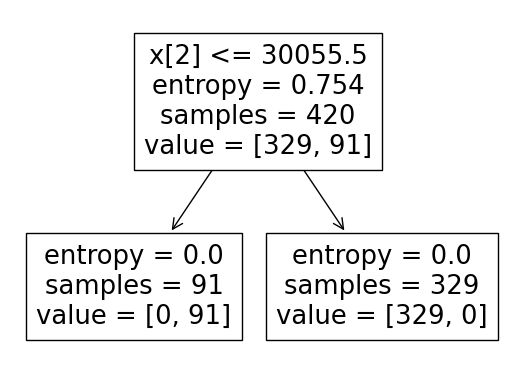

In [18]:
tree.plot_tree(model2);                            #PLot the decision tree

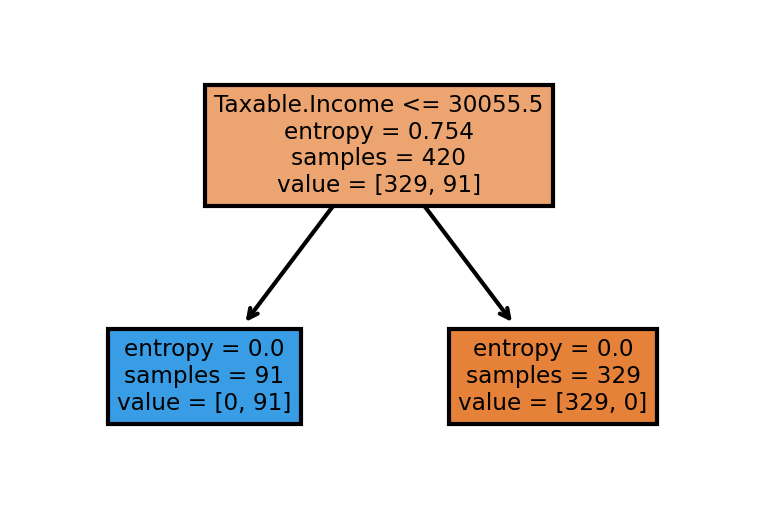

In [19]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model2,
               feature_names = fn,
               #class_names=cn,
               filled = True);

In [20]:
preds2 = model2.predict(x_test)
pd.Series(preds2).value_counts()

0    147
1     33
dtype: int64

In [21]:
preds2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [22]:
y_test

,Target
312,0
174,0
51,0
186,0
223,0
...,...
240,0
540,1
13,0
101,0


In [23]:
y_test2 = y_test.to_numpy()
y_test2 = np.reshape(y_test2, 180)
y_test2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [24]:
pd.crosstab(y_test2,preds2) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
row_0,,
0,147,0
1,0,33


# Building Decision Tree Classifier (CART) using Gini Criteria

In [25]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.22,random_state=18)
from sklearn.tree import DecisionTreeClassifier
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
y_test

,Target
129,0
533,1
473,0
401,0
221,0
...,...
568,0
217,0
186,0
562,0


In [27]:
y_test3 = y_test.to_numpy()
y_test3 = np.reshape(y_test3, 132)
y_test3

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [28]:
#Prediction and computing the accuracy
pred=model2.predict(x_test)
np.mean(pred==y_test3)

1.0

# Decision Tree Regression Example

In [29]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
array = f_c.values
X = array[:,0:5]
y = array[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
model.score(X_test,y_test)           #Accuracy

1.0